In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
import warnings
warnings.filterwarnings(action="ignore")

df = pd.read_csv('bank.csv')

sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

LE=LabelEncoder()
df['deposit']=LE.fit_transform(df.deposit.values)

#encoding categorical features
df=pd.get_dummies(df)
print(df.shape)

#partitioning
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

#partition x/y
xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit

xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit
print(xtrain.shape)
print(xtest.shape)

scaler = StandardScaler()
xtest = scaler.fit_transform(xtest)
xtrain = scaler.fit_transform(xtrain)

pca = PCA(0.9)
xtrain = pca.fit_transform(xtrain)
xtest = pca.fit_transform(xtest)
print(xtrain.shape)
print(xtest.shape)


(11162, 52)
(8929, 51)
(2233, 51)
(8929, 33)
(2233, 33)


accuracy is 0.616211
Precision Score:  0.597478176527643
Recall Score:  0.5822306238185255
f1 Score: 0.5897558640497845
Matthews correlation coefficient 0.22939814118511317
Area Under ROC 0.8733419136870049


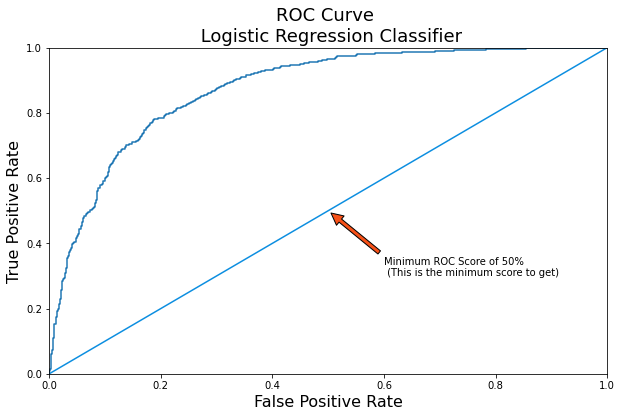

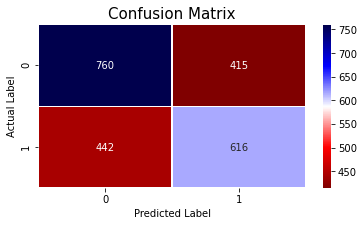

Time taken to apply the model to testing data and calculate performance metrics 1.055071053999999


In [2]:
# Logistic Regression
t_start = time.perf_counter()
log_reg= LogisticRegression()
log_reg.fit(xtrain,ytrain)
y_pred = log_reg.predict(xtest)

print ("accuracy is %f" % accuracy_score(ytest,y_pred))
print('Precision Score: ', precision_score(ytest,y_pred))
print('Recall Score: ', recall_score(ytest,y_pred))
print('f1 Score:',f1_score(ytest, y_pred))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))


log_y_scores = cross_val_predict(log_reg, xtest, ytest, cv=10, method="predict_proba")
if log_y_scores.ndim == 2:
    log_y_scores = log_y_scores[:, 1]
    
log_fpr, log_tpr, log_threshold = roc_curve(ytest, log_y_scores)  
print('Area Under ROC', metrics.auc(log_fpr,log_tpr))

def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Logistic Regression Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(log_fpr, log_tpr, log_threshold)
plt.show()




conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)


0.7603309748467151
Time taken for training the model with training set is 1.9605864599999983
accuracy is 0.632781
Precision Score:  0.5708884688090737
Recall Score:  0.622680412371134
f1 Score: 0.5956607495069034
Matthews correlation coefficient 0.26130198060315113
Area Under ROC 0.778902787274263


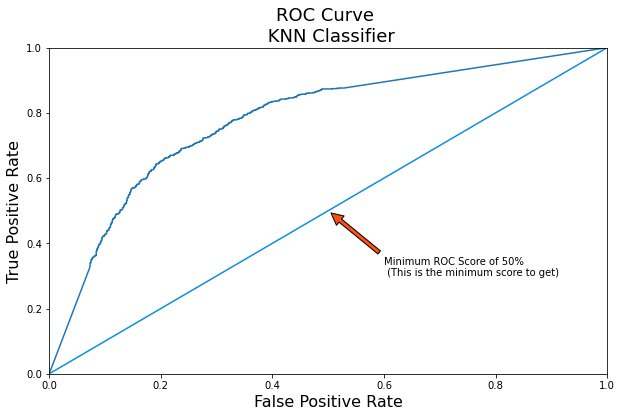

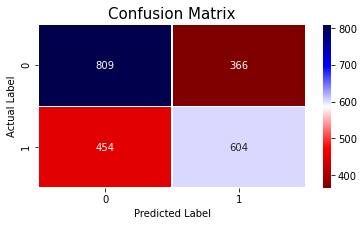

Time taken to apply the model to testing data and calculate performance metrics 1.186181922000003


In [3]:
# KNearestNeighbors
t_start = time.perf_counter()
knn_clf = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=10)
knn_mean = knn_scores.mean()
print(knn_mean)
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken for training the model with training set is",t_diff)
t_start = time.perf_counter()
knn_clf.fit(xtrain, ytrain)
y_pred = knn_clf.predict(xtest)

print ("accuracy is %f" % accuracy_score(y_pred, ytest))
print('Precision Score: ', precision_score(y_pred, ytest))
print('Recall Score: ', recall_score(y_pred, ytest))
print('f1 Score:',f1_score(y_pred, ytest))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))


knn_y_scores = cross_val_predict(knn_clf, xtest, ytest, cv=10, method="predict_proba")
if knn_y_scores.ndim == 2:
    knn_y_scores = knn_y_scores[:, 1]

knn_fpr, knn_tpr, knn_threshold = roc_curve(ytest, knn_y_scores)
print('Area Under ROC', metrics.auc(knn_fpr,knn_tpr))

def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n KNN Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(knn_fpr, knn_tpr, knn_threshold)
plt.show()


conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)

accuracy is 0.624720
Precision Score:  0.7155009451795841
Recall Score:  0.5850077279752705
f1 Score: 0.6437074829931972
Matthews correlation coefficient 0.26144974405930965
Area Under ROC 0.8649455013473837


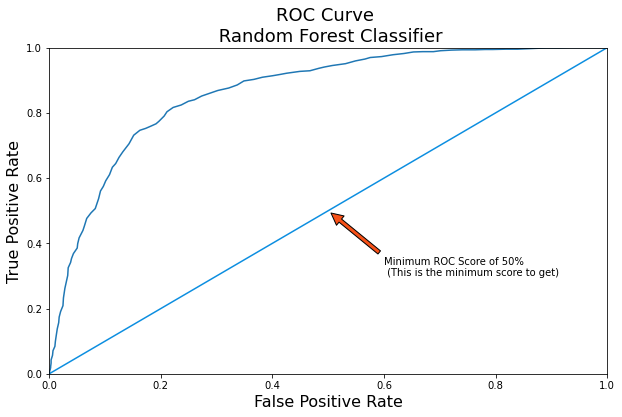

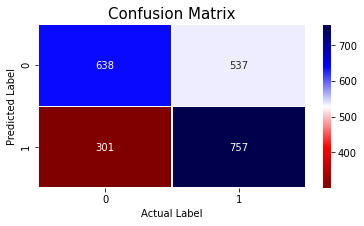

Time taken to apply the model to testing data and calculate performance metrics 14.97530015700002


In [5]:
# Random Forest Classifier
rand_clf= RandomForestClassifier()
t_start = time.perf_counter()
rand_clf.fit(xtrain, ytrain)
#y_pred = cross_val_predict(rand_clf, xtest, ytest, cv=10)
y_pred = rand_clf.predict(xtest)

print ("accuracy is %f" % accuracy_score(y_pred, ytest))
print('Precision Score: ', precision_score(y_pred, ytest))
print('Recall Score: ', recall_score(y_pred, ytest))
print('f1 Score:',f1_score(y_pred, ytest))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))

rand_y_scores = cross_val_predict(rand_clf, xtest, ytest, cv=10, method="predict_proba")
if rand_y_scores.ndim == 2:
    rand_y_scores = rand_y_scores[:, 1]

rand_fpr, rand_tpr, rand_threshold = roc_curve(ytest, rand_y_scores)   
print('Area Under ROC', metrics.auc(rand_fpr,rand_tpr))

def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Random Forest Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(rand_fpr, rand_tpr, rand_threshold)
plt.show()



conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_xlabel('Actual Label')
ax.set_ylabel('Predicted Label')
plt.show()
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)

0.7459961383757073
Time taken for training the model with training set is 4.715417208000019
accuracy is 0.557994
Precision Score:  0.5973534971644613
Recall Score:  0.5297569153394803
f1 Score: 0.5615282096845846
Matthews correlation coefficient 0.12002405225173764
Area Under ROC 0.6930326187507542


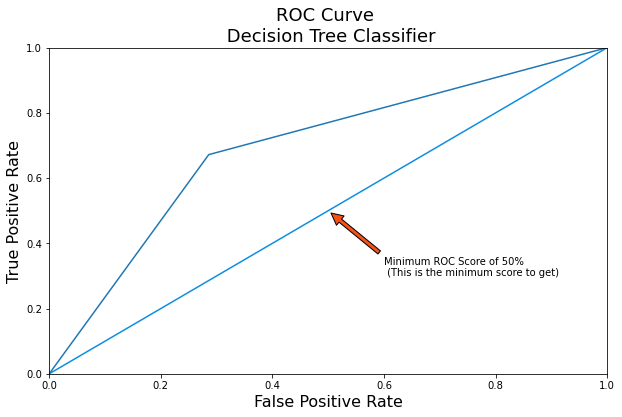

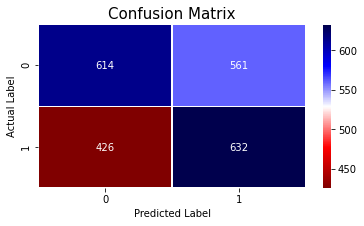

Time taken to apply the model to testing data and calculate performance metrics 1.8722435799999744


In [7]:
# Decision Tree
t_start = time.perf_counter()
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=10)
tree_mean = tree_scores.mean()
print(tree_mean)
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken for training the model with training set is" ,t_diff)
t_start = time.perf_counter()
tree_clf.fit(xtrain, ytrain)
#y_pred = cross_val_predict(tree_clf, xtest, ytest, cv=10)
y_pred = tree_clf.predict(xtest)

print ("accuracy is %f" % accuracy_score(y_pred, ytest))
print('Precision Score: ', precision_score(y_pred, ytest))
print('Recall Score: ', recall_score(y_pred, ytest))
print('f1 Score:',f1_score(y_pred, ytest))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))


tree_y_scores = cross_val_predict(tree_clf, xtest, ytest, cv=10, method="predict_proba")
if tree_y_scores.ndim == 2:
    tree_y_scores = tree_y_scores[:, 1]

tree_fpr, tree_tpr, tree_threshold = roc_curve(ytest, tree_y_scores)   
print('Area Under ROC', metrics.auc(tree_fpr,tree_tpr))

def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Decision Tree Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(tree_fpr, tree_tpr, tree_threshold)
plt.show()



conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()

t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)

0.8409666112614806
Time taken for training the model with training set is 46.238088629
accuracy is 0.622929
Precision Score:  0.6502835538752363
Recall Score:  0.593103448275862
f1 Score: 0.6203787195671777
Matthews correlation coefficient 0.2484285971622961


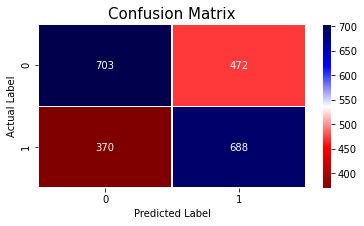

Time taken to apply the model to testing data and calculate performance metrics 6.701549598000042


In [6]:
# SVC

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
pipe_svm= make_pipeline(StandardScaler(), SVC(random_state=1))
#r=[0.1,1,10]
#pg_svm=[{'svc__C':r, 'svc__kernel':['linear']},{'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]

#gs_svm=GridSearchCV(estimator= pipe_svm,param_grid= pg_svm,scoring='accuracy',cv=2)


t_start = time.perf_counter()
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=10)
svc_mean = svc_scores.mean()
print(svc_mean)
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken for training the model with training set is",t_diff)


t_start = time.perf_counter()
from sklearn.metrics import accuracy_score
svc_clf.fit(xtrain, ytrain)
y_pred = svc_clf.predict(xtest)
print ("accuracy is %f" % accuracy_score(y_pred, ytest))
print('Precision Score: ', precision_score(y_pred, ytest))
print('Recall Score: ', recall_score(y_pred, ytest))
print('f1 Score:',f1_score(y_pred, ytest))
print('Matthews correlation coefficient', matthews_corrcoef(ytest, y_pred))


conf_matrix = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(conf_matrix ,annot=True,cmap= "seismic_r", fmt="g", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
plt.show()
t_end = time.perf_counter()
t_diff = t_end - t_start
print("Time taken to apply the model to testing data and calculate performance metrics" ,t_diff)